# Sick or not ?

Neural networks are also used and work very well on more traditional data sets than images. Here is a set of data that contains a column with the white blood cell rate, another with the red blood cell rate and a last one with an indication of who is sick or not. (Not sick = 0, sick = 1)

The (fictionals) dataset is located in the dataset folder, here is the path :  

``"./dataset/sick_or_not.csv"`` 

Rows : 40000

## Your task:

Design a model that recognizes if the person is sick based on white and red blood cells.  
Use neural networks to perform this task. 

![](https://d418bv7mr3wfv.cloudfront.net/s3/W1siZiIsIjIwMTcvMDUvMzAvMDYvNTMvNTcvODk3L2dpcmwtMjE3MTA1Ml85NjBfNzIwLmpwZyJdLFsicCIsInRodW1iIiwiOTgweDU4MCMiXV0)

### Score to beat :
Accuracy: **% 96.025**  
Loss : **0.1151**  
Epochs : **40**  
That means that out of **8000** test samples, this model got **7682** correct and **318** incorrect.

In [1]:
###Enter your code here !
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

C:\Anaconda3\envs\py3-TF2\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.__version__

'2.0.0-alpha0'

## Exploring and Processing the Data

#### Read in the CSV (comma separated values) file and convert them to arrays.

In [3]:
df = pd.read_csv('./dataset/sick_or_not.csv')

In [4]:
df.head()

,white_blood_cell,red_blood_cell,sick
0,1.178028,0.464315,0.0
1,0.844175,2.440351,0.0
2,2.878409,-1.438124,1.0
3,-0.057521,2.054928,1.0
4,-1.232600,-2.722805,0.0


#### The dataset that we have now is in what we call a pandas dataframe. To convert it to an array, simply access its values:

In [5]:
dataset = df.values

In [6]:
type(dataset)

numpy.ndarray

In [7]:
dataset.shape

(40000, 3)

#### Now, we split the dataset into our input features and the label we wish to predict.

In [8]:
X=dataset[:,0:2]
Y=dataset[:,2]

In [9]:
X.shape

(40000, 2)

In [10]:
X

array([[ 1.17802829,  0.46431541],
       [ 0.84417477,  2.44035071],
       [ 2.87840931, -1.43812353],
       ...,
       [-2.19231952, -3.35627247],
       [ 3.10098002, -2.56139684],
       [-1.60539689,  2.68097145]])

In [11]:
Y

array([0., 0., 1., ..., 0., 1., 1.])

In [12]:
Y.shape

(40000,)

### Rescaling x

#### We'll use a min-max scaler from scikit-learn which scales our data to be between 0 and 1.

In [13]:
X_scale = X.astype('float32')

In [14]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [15]:
X_scale

array([[0.61645665, 0.53248062],
       [0.58710922, 0.70095273],
       [0.76592881, 0.37028316],
       ...,
       [0.32018589, 0.2067463 ],
       [0.78549391, 0.27451552],
       [0.37177938, 0.72146749]])

In [16]:
import seaborn as sns
sns.pairplot(x_vars=["white_blood_cell"],  y_vars=["red_blood_cell"], hue="sick",data=df, size=15)

#### Categorical encoding y

In [17]:
Y_encoding= tensorflow.keras.utils.to_categorical(Y,num_classes=2,dtype='float32')

##  train_test_split

#### Lastly, we wish to set aside some parts of our dataset for a validation set and a test set. We use the function train_test_split from scikit-learn to do that

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y_encoding, test_size=0.25,random_state =1 )

In [19]:
print(X_train.shape, Y_train.shape)

(30000, 2) (30000, 2)


## Building and Training Our First Neural Network

In [20]:
model = Sequential()

In [21]:
model.add(Dense(4, input_shape=(2,)))
model.add(Activation('sigmoid'))

In [22]:
model.add(Dense(2))
model.add(Activation('sigmoid'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
activation (Activation)      (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [25]:
model.fit(X_train,Y_train,epochs = 40)

Epoch 1/40
30000/30000 [==============================] - 2s 68us/sample - loss: 0.6952 - accuracy: 0.4914
Epoch 2/40
30000/30000 [==============================] - 2s 56us/sample - loss: 0.6932 - accuracy: 0.4922
Epoch 3/40
30000/30000 [==============================] - 2s 55us/sample - loss: 0.6933 - accuracy: 0.4964
Epoch 4/40
30000/30000 [==============================] - 2s 55us/sample - loss: 0.6932 - accuracy: 0.5048
Epoch 5/40
30000/30000 [==============================] - 2s 57us/sample - loss: 0.6933 - accuracy: 0.5040
Epoch 6/40
30000/30000 [==============================] - 2s 63us/sample - loss: 0.6932 - accuracy: 0.5009
Epoch 7/40
30000/30000 [==============================] - 2s 63us/sample - loss: 0.6932 - accuracy: 0.4976
Epoch 8/40
30000/30000 [==============================] - 2s 68us/sample - loss: 0.6932 - accuracy: 0.5004
Epoch 9/40
30000/30000 [==============================] - 2s 61us/sample - loss: 0.6932 - accuracy: 0.5024
Epoch 10/40
30000/30000 [============

## Evaluating the model

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix
predictions = model.predict(X_test)
print("X_test",type(X_test))
print("X_test",X_test.shape)
print(type(predictions))
print(predictions.shape)
print("Accuracy: %", accuracy_score(Y_test.argmax(axis=1), predictions.argmax(axis=1)) * 100)

correct_preds = (Y_test.argmax(axis=1) == predictions.argmax(axis=1))
print("That means that out of", Y_test.shape[0] ,"test samples, this model got", 
      np.where(correct_preds)[0].size, "correct and",
      np.where(~correct_preds)[0].size, "incorrect")

X_test <class 'numpy.ndarray'>
X_test (10000, 2)
<class 'numpy.ndarray'>
(10000, 2)
Accuracy: % 91.58
That means that out of 10000 test samples, this model got 9158 correct and 842 incorrect


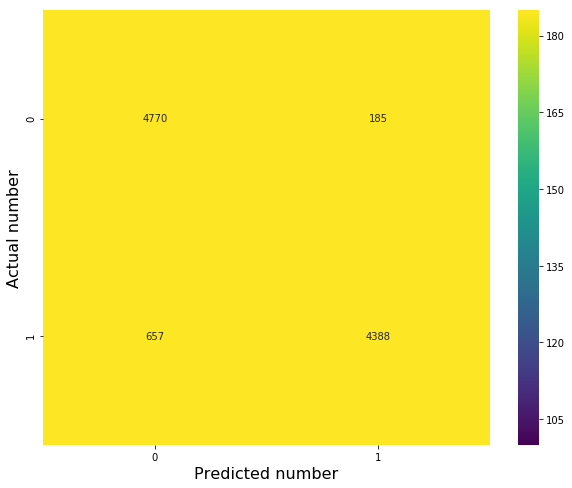

In [28]:
import seaborn as sns
# Import matplotlib
import matplotlib.pyplot as plt 
cm = confusion_matrix(Y_test.argmax(axis=1), predictions.argmax(axis=1))

plt.figure(figsize=(10, 8))
sns.heatmap(cm, cmap="viridis", vmax=100, annot=True, fmt='g')
plt.gca().set_xlabel("Predicted number", fontsize=16)
plt.gca().set_ylabel("Actual number", fontsize = 16)
plt.show()